In [1]:
import pandas as pd
import numpy as np

In [38]:
L='nktr aig luv pch wdc nclh celg dwdp spxc ame xyl stt r akam reg dov xray chd apc'.upper().split(' ')

Merge the price data the same way as the quote and ask data, while for the size variable we sum over each 10 second period.

In [3]:
df=pd.read_csv('11011116_vwap.csv',header=0)


C:\Users\DR\AppData\Local\Programs\Python\Python36\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [68]:
def VWAP_calc(ticker,capital):
    df_t=df[df['SYM_ROOT']==ticker]
    D=list(set(df_t['DATE']))
    St=[]
    for d in D[:-1]:
        s=[]
        i=-1
        T=[]
        df_d=df_t[df_t['DATE']==d]
        for j in range(len(df_d['TIME_M'])):
            
            if len(T)>0 and (int(np.array(df_d['TIME_M'])[j][-15:-13])-int(T[-1][-2:]))>1:
                    s.append(0)
            if np.array(df_d['TIME_M'])[j][:-13] not in T:
                i+=1
                T.append(str(np.array(df_d['TIME_M'])[j][:-13]))

                s.append(np.array(df_d['SIZE'])[j])
            else:
                s[i]+=np.array(df_d['SIZE'])[j]
        if '9:30' not in T:
            s=[0]+s
        if len(s)==30:
            St.append(s)
    St=np.array(St,dtype=float)
    for i in range(len(St)):
        St[i,:]=St[i,:]/float(np.sum(St[i,:]))
    vol_mean=np.mean(St,axis=0)
    df_d=df_t[df_t['DATE']==D[0]]
    T=[]
    s_start=[]
    p_start=[]
    i=-1
    for j in range(len(df_d['TIME_M'])):
        
        if len(T)>0 and (int(np.array(df_d['TIME_M'])[j][-15:-13])-int(T[-1][-2:]))>1:
            
                s_start.append(0)
                p_start.append(p_start[-1])
        if np.array(df_d['TIME_M'])[j][:-13] not in T:
            
            i+=1
            T.append(str(np.array(df_d['TIME_M'])[j][:-13]))
            p_start.append(np.array(df_d['PRICE'])[j])
            s_start.append(np.array(df_d['SIZE'])[j])
        else:
            s_start[i]+=np.array(df_d['SIZE'])[j]
    if '9:30' not in T:
        s_start=[0]+s_start
        p_start=[0]+p_start
    df_d=df_t[df_t['DATE']==D[-1]]
    T=[]
    s_end=[]
    p_end=[]
    i=-1
    for j in range(len(df_d['TIME_M'])):
        
        if len(T)>0 and (int(np.array(df_d['TIME_M'])[j][-15:-13])-int(T[-1][-2:]))>1:
           
                s_end.append(0)
                p_end.append(p_end[-1])
        if np.array(df_d['TIME_M'])[j][:-13] not in T:
            i+=1
            T.append(str(np.array(df_d['TIME_M'])[j][:-13]))
            p_end.append(np.array(df_d['PRICE'])[j])
            s_end.append(np.array(df_d['SIZE'])[j])
        else:
            s_end[i]+=np.array(df_d['SIZE'])[j]
    if '9:30' not in T:
        s_end=[0]+s_end
        p_end=[0]+p_end
    #print(T)
    Dict_=np.load('data.npy').item()
    p_d=np.array(Dict_[ticker.lower()]['Close'])[22]
    cap=capital
    size=int(cap/p_d)
    hb,r,pb=execution(vol_mean,size,s_start,p_start)
   
    size=int(cap/p_d)
    hs,r,ps=execution(vol_mean,size,s_end,p_end)
    h,bb=benchmark(size,s_start,p_start)
    h,bs=benchmark(size,s_end,p_end)
    print('2018.11.01 (Buy)Executed VWAP:'+str(pb)+' '+'Benchmark VWAP:'+str(bb))
    print('2018.11.16 (Sell)Executed VWAP:'+str(ps)+' '+'Benchmark VWAP:'+str(bs))
    return St,(size*ps-size*pb)/(size*pb),hb,hs,pb,ps,bb,bs

In [69]:
for i in L:
    try:
        print(i)
        record=VWAP_calc(i,100000)
    except:
        pass

NKTR
2018.11.01 (Buy)Executed VWAP:39.06896790652492 Benchmark VWAP:39.00895650205807
2018.11.16 (Sell)Executed VWAP:38.212817464585115 Benchmark VWAP:38.22913785179783
AIG
2018.11.01 (Buy)Executed VWAP:43.21987729064524 Benchmark VWAP:43.32509161169625
2018.11.16 (Sell)Executed VWAP:42.544255656982465 Benchmark VWAP:42.485462647909934
LUV
2018.11.01 (Buy)Executed VWAP:49.54378738807942 Benchmark VWAP:49.521779570921204
2018.11.16 (Sell)Executed VWAP:52.715399296269936 Benchmark VWAP:52.67971999238244
PCH
WDC
2018.11.01 (Buy)Executed VWAP:43.801758143377725 Benchmark VWAP:43.82254955464707
2018.11.16 (Sell)Executed VWAP:46.244642914484324 Benchmark VWAP:46.25466260499721
NCLH
2018.11.01 (Buy)Executed VWAP:44.77734712494912 Benchmark VWAP:44.80605068768057
2018.11.16 (Sell)Executed VWAP:50.72794579051365 Benchmark VWAP:50.566419441226685
CELG
2018.11.01 (Buy)Executed VWAP:73.24632613084445 Benchmark VWAP:73.37403032354601
2018.11.16 (Sell)Executed VWAP:69.71660406309553 Benchmark VWAP:6

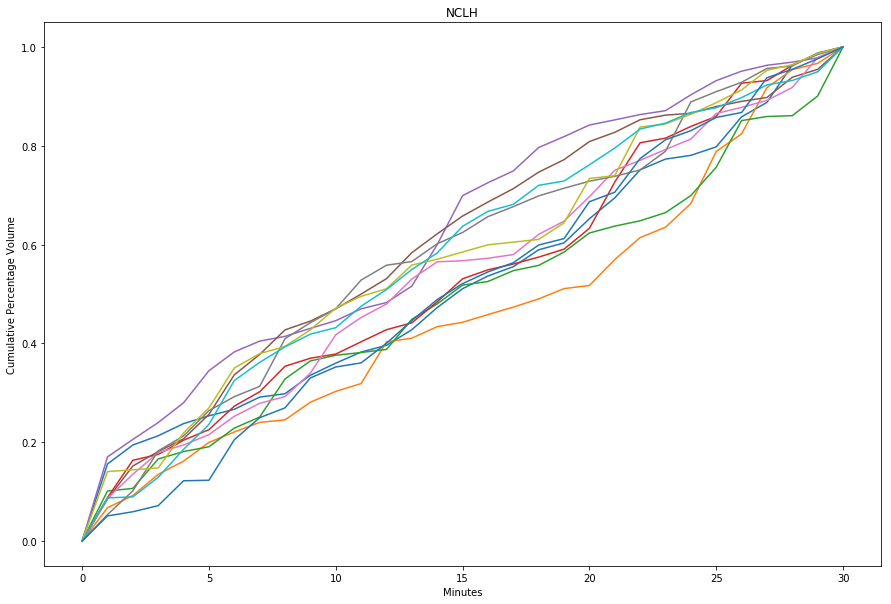

In [30]:
from matplotlib import pyplot as plt
%matplotlib inline
def plot_cumper(St,name):
    plt.figure(figsize=(15,10))
    for i in range(len(St)):
        c=[0]+[np.sum(St[i,:j+1]) for j in range(len(St[i]))]
        plt.plot(c)
        plt.title(name)
        plt.xlabel('Minutes')
        plt.ylabel('Cumulative Percentage Volume')
plot_cumper(St,L[6])

In [40]:
def execution(target_percentage,size,real_volume,real_price):
    i=0
    VWAP=0
    size_=size
    history=[]
    while size>0 and i<len(target_percentage):
        goal=target_percentage[i]*size_
        if i==len(target_percentage)-1:
            realized=min(size,real_volume[i])
        else:
            realized=min(goal,real_volume[i])
        realized=min(realized,size)
        VWAP+=realized*real_price[i]
        history.append(realized)
        
        i+=1
        size-=realized
    history=np.array(history)
    return history,size,VWAP/float(np.sum(history))
def benchmark(size,real_volume,real_price):
    history=np.array(real_volume)*size/float(sum(real_volume))
    VWAP=np.sum(history*np.array(real_price))
    return history,VWAP/float(np.sum(history))
